In [31]:
import mercantile
import requests
from vt2geojson.tools import vt_bytes_to_geojson
import geopandas as gpd
import pandas as pd


from shapely.geometry import box
from shapely.geometry import shape


#from osm2geojson import json2geojson

import logging
from datetime import datetime, timezone
from tqdm import tqdm
import json

import os

from pathlib import Path



In [32]:
import pyproj
print(pyproj.__version__)
print(dir(pyproj))

3.7.1
['CRS', 'DataDirError', 'Geod', 'PROJ_COMPILED_VERSION', 'PROJ_COMPILED_VERSION_STR', 'PROJ_VERSION', 'PROJ_VERSION_STR', 'Proj', 'ProjError', 'Transformer', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__proj_compiled_version__', '__proj_version__', '__spec__', '__version__', '_compat', '_context', '_crs', '_geod', '_network', '_show_versions', '_sync', '_transformer', '_version', 'aoi', 'crs', 'database', 'datadir', 'enums', 'exceptions', 'geod', 'geodesic_version_str', 'get_authorities', 'get_codes', 'get_ellps_map', 'get_prime_meridians_map', 'get_proj_operations_map', 'get_units_map', 'itransform', 'list', 'network', 'pj_ellps', 'pj_list', 'proj', 'proj_version_str', 'pyproj', 'set_use_global_context', 'show_versions', 'sync', 'transform', 'transformer', 'utils', 'warnings']


### Berlin

<Axes: >

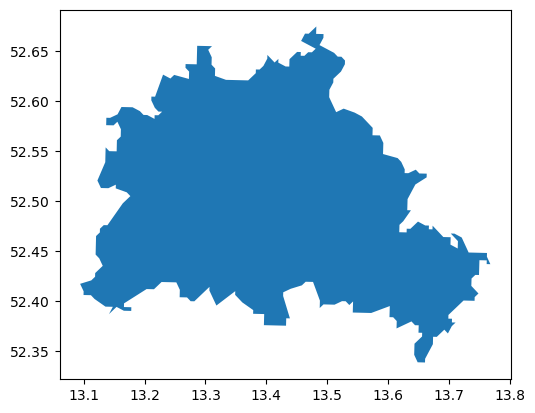

In [33]:
### get shape of Berlin
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland=bland[bland["id"].isin(["DE-BE"])]
bland.plot()

In [34]:
### get the number of tiles that would be downloaded

# Get the bounds of the polygon
polygon = bland.dissolve().geometry.iloc[0]
minx, miny, maxx, maxy = polygon.bounds

# === Define bounding box (Berlin or any area) ===
bbox = [minx, miny, maxx, maxy]  # must be defined earlier

# === Get intersecting tiles at zoom 14 ===
tiles = list(mercantile.tiles(*bbox, zooms=[14]))
total_tiles = len(tiles)

total_tiles

832

Text(0.5, 1.0, 'Berlin Boundary and mapillary tiles for bbox, n=832')

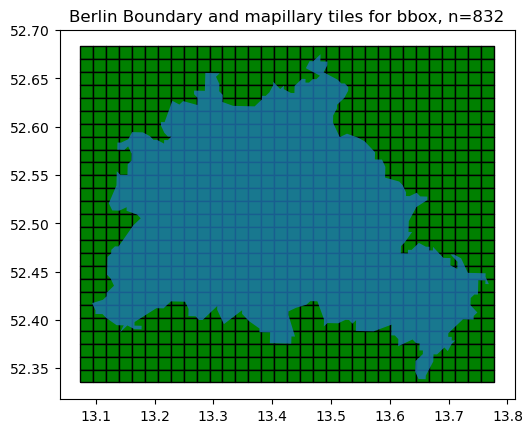

In [35]:
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

# Create a list of polygons
polygons = []
for tile in tiles:
    minx, miny, maxx, maxy = mercantile.bounds(tile)
    polygons.append(Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny)]))

# Combine the polygons into a single multi-polygon
multi_polygon = MultiPolygon(polygons)

gdf = gpd.GeoDataFrame(geometry=[multi_polygon])
#gdf.plot(edgecolor='black', facecolor='green')

ax = gdf.plot(color='green', edgecolor='black')
bland.plot(ax=ax, alpha=0.8)
ax.set_title("Berlin Boundary and mapillary tiles for bbox, n="+str(total_tiles))

In [36]:
polygon = bland.dissolve().geometry.iloc[0]

from shapely.geometry import box
import mercantile
from tqdm import tqdm  # Import tqdm

# Assuming `polygon` is your shapely Polygon (already from dissolve)
# `tiles` is your list of mercantile.Tile objects

filtered_tiles = []

for tile in tqdm(tiles):
    # Get tile bounds as a shapely box
    tile_bounds = mercantile.bounds(tile)
    tile_polygon = box(tile_bounds.west, tile_bounds.south, tile_bounds.east, tile_bounds.north)
    tile_centroid = tile_polygon.centroid

    # Check if the tile intersects the polygon
    if polygon.intersects(tile_centroid):
        filtered_tiles.append(tile)

100%|██████████| 832/832 [00:00<00:00, 18079.46it/s]


Text(0.5, 1.0, 'Berlin Boundary and mapillary tiles for polygon, n=399')

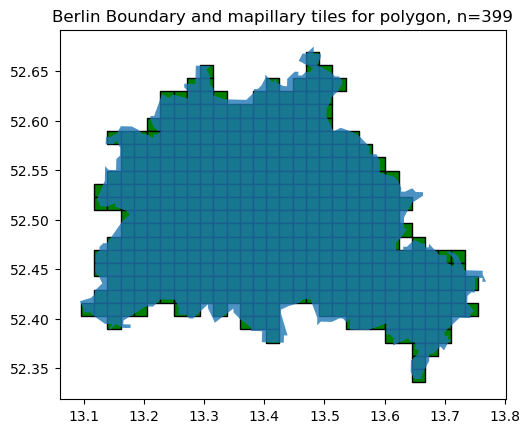

In [37]:
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

# Create a list of polygons
polygons = []
for tile in filtered_tiles:
    minx, miny, maxx, maxy = mercantile.bounds(tile)
    polygons.append(Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny)]))

# Combine the polygons into a single multi-polygon
multi_polygon = MultiPolygon(polygons)

gdf = gpd.GeoDataFrame(geometry=[multi_polygon])
#gdf.plot()

#bland.plot(ax=gdf.plot(color='green', edgecolor='black'), alpha=0.8)
ax = gdf.plot(color='green', edgecolor='black')
bland.plot(ax=ax, alpha=0.8)
ax.set_title("Berlin Boundary and mapillary tiles for polygon, n="+str(len(filtered_tiles)))

### Germany

<Axes: >

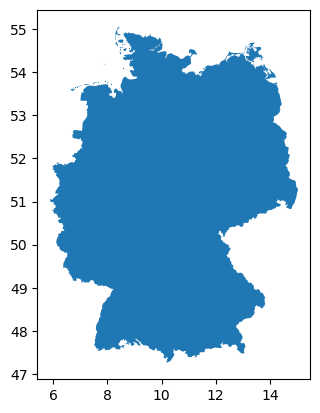

In [46]:
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland.dissolve().plot()

In [47]:
# Get the bounds of the polygon
polygon = bland.dissolve().geometry.iloc[0]
minx, miny, maxx, maxy = polygon.bounds

# === Define bounding box (Berlin or any area) ===
bbox = [minx, miny, maxx, maxy]  # must be defined earlier

# === Get intersecting tiles at zoom 14 ===
tiles = list(mercantile.tiles(*bbox, zooms=[14]))
total_tiles = len(tiles)

total_tiles # bbox


237424

In [48]:
#tiles[:10]

In [49]:
## takes ~2min 

#polygon = bland.dissolve().geometry.iloc[0]

# Assuming `polygon` is your shapely Polygon (already from dissolve)
# `tiles` is your list of mercantile.Tile objects

filtered_tiles = []

for tile in tqdm(tiles):
    # Get tile bounds as a shapely box
    tile_bounds = mercantile.bounds(tile)
    tile_polygon = box(tile_bounds.west, tile_bounds.south, tile_bounds.east, tile_bounds.north)
    tile_centroid = tile_polygon.centroid

    # Check if the tile intersects the polygon
    if polygon.intersects(tile_centroid):
        filtered_tiles.append(tile)

100%|██████████| 237424/237424 [01:04<00:00, 3664.82it/s]


Text(0.5, 1.0, 'Germany Boundary and mapillary tiles for polygon, n=151726')

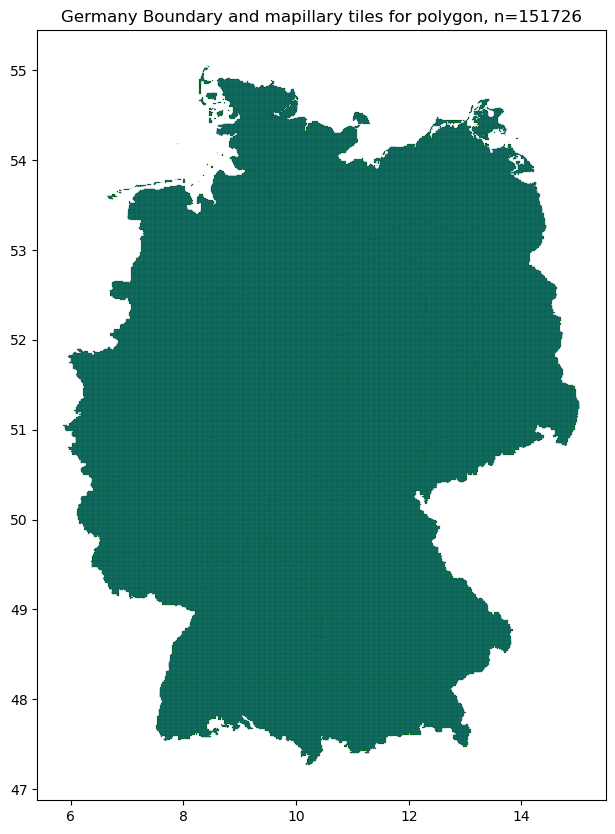

In [50]:
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

# Create a list of polygons
polygons = []
for tile in filtered_tiles:
    minx, miny, maxx, maxy = mercantile.bounds(tile)
    polygons.append(Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny)]))

# Combine the polygons into a single multi-polygon
multi_polygon = MultiPolygon(polygons)

gdf = gpd.GeoDataFrame(geometry=[multi_polygon])
#gdf.plot()

ax = gdf.plot(color='green', edgecolor='black', linewidth=0.1, figsize=(10, 10))
bland.plot(ax=ax, alpha=0.5)
ax.set_title("Germany Boundary and mapillary tiles for polygon, n="+str(len(filtered_tiles)))

In [51]:
len(filtered_tiles)

151726

In [56]:
filtered_tiles

[Tile(x=8459, y=5481, z=14),
 Tile(x=8460, y=5481, z=14),
 Tile(x=8460, y=5482, z=14),
 Tile(x=8460, y=5483, z=14),
 Tile(x=8460, y=5484, z=14),
 Tile(x=8461, y=5481, z=14),
 Tile(x=8461, y=5482, z=14),
 Tile(x=8461, y=5483, z=14),
 Tile(x=8461, y=5484, z=14),
 Tile(x=8461, y=5485, z=14),
 Tile(x=8462, y=5482, z=14),
 Tile(x=8462, y=5483, z=14),
 Tile(x=8462, y=5484, z=14),
 Tile(x=8462, y=5485, z=14),
 Tile(x=8463, y=5425, z=14),
 Tile(x=8463, y=5482, z=14),
 Tile(x=8463, y=5483, z=14),
 Tile(x=8463, y=5484, z=14),
 Tile(x=8463, y=5485, z=14),
 Tile(x=8463, y=5499, z=14),
 Tile(x=8464, y=5424, z=14),
 Tile(x=8464, y=5425, z=14),
 Tile(x=8464, y=5426, z=14),
 Tile(x=8464, y=5430, z=14),
 Tile(x=8464, y=5480, z=14),
 Tile(x=8464, y=5481, z=14),
 Tile(x=8464, y=5482, z=14),
 Tile(x=8464, y=5483, z=14),
 Tile(x=8464, y=5484, z=14),
 Tile(x=8464, y=5485, z=14),
 Tile(x=8464, y=5499, z=14),
 Tile(x=8464, y=5500, z=14),
 Tile(x=8465, y=5424, z=14),
 Tile(x=8465, y=5425, z=14),
 Tile(x=8465, 

In [ ]:
14/8592/5414

In [ ]:
14/8647/5668

In [60]:
from mercantile import Tile

tile_index = filtered_tiles.index(Tile(x=8647, y=5668, z=14))
tile_index

67820

In [43]:
### Processing tiles:  45%|████▌     | 107275/237424 [13:00:49<15:47:19,  2.29it/s]
## Deutschland 151726 tiles take ~ 24h


## Berlin 399 tiles take ~15min

In [61]:




checkpoint_interval = 1000
checkpoint_counter = 1

# Get current date in YYYY-MM-DD format
current_date = datetime.now().strftime('%Y-%m-%d')

# set the area to be processed
area_name= "germany"


## set output directory
output_directory=f"output_{area_name}_{current_date}_3"

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)


# Set up logging
os.makedirs("logging", exist_ok=True)
logging.basicConfig(
    filename=f"logging/tile_processing_{current_date}.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S"
)

# === Set up ===
tile_layer = "sequence"  # or 'image' for points
tile_coverage = "mly1_computed_public"


# Access the token
# Load the JSON config
with open('config.json') as f:
    config = json.load(f)
ACCESS_TOKEN = config.get("ACCESS_TOKEN")


#tiles=filtered_tiles[67821:]#[:30] # do first 80k tiles
#tiles=filtered_tiles[39000:]
tiles=filtered_tiles[67821:]
total_tiles = len(tiles)
logging.info(f"Total number of tiles to process: {total_tiles}")




# === Collect all features into one GeoDataFrame
gdf_all = gpd.GeoDataFrame(columns=["geometry"], crs="EPSG:4326")

#for i, tile in enumerate(tqdm(tiles[:5], desc="Processing tiles"), start=1):  # or all tiles
for i, tile in enumerate(tqdm(tiles, desc="Processing tiles"), start=1):  # or all tiles
    logging.info(f"Processing tile {i}/{total_tiles}: {tile.z}/{tile.x}/{tile.y}...")
    url = f"https://tiles.mapillary.com/maps/vtp/{tile_coverage}/2/{tile.z}/{tile.x}/{tile.y}?access_token={ACCESS_TOKEN}"
    response = requests.get(url)
    
    if response.status_code != 200:
        logging.warning(f"Error fetching tile {tile.x}/{tile.y}: {response.status_code}")
        continue

    try:
        # Decode tile into GeoJSON format
        geojson = vt_bytes_to_geojson(response.content, tile.x, tile.y, tile.z, layer=tile_layer)
        features = geojson.get("features", [])

        if not features:
            logging.info(f"No features found in tile {tile.x}/{tile.y}.")
            continue

        # Convert to GeoDataFrame
        gdf_tile = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")

        gdf_tile['captured_at'] = gdf_tile['captured_at'].apply(lambda x: datetime.fromtimestamp(x / 1000, tz=timezone.utc))
        #timefilter
        gdf_tile = gdf_tile[gdf_tile['captured_at'] >= datetime(2023, 1, 1, tzinfo=timezone.utc)]
        gdf_tile['captured_at'] = gdf_tile['captured_at'].dt.strftime('%Y-%m-%d')
        gdf_tile['tile_x'] = tile.x
        gdf_tile['tile_y'] = tile.y

        if len(gdf_tile) == 0:
            logging.info(f"No features newer than 2023 in tile {tile.x}/{tile.y}.")
            #continue
        else:
            # Append to master dataframe using concat for better performance with many tiles
            gdf_all = gpd.GeoDataFrame(pd.concat([gdf_all, gdf_tile], ignore_index=True), crs="EPSG:4326")

                # Checkpoint save every 1000 tiles
        if i % checkpoint_interval == 0:
            checkpoint_filename = f"{output_directory}/mapillary_coverage_from23-01-01_part{checkpoint_counter}_{current_date}.parquet"
            gdf_all.to_parquet(checkpoint_filename, index=False)
            logging.info(f"Checkpoint: saved {len(gdf_all)} features to {checkpoint_filename}")
            checkpoint_counter += 1

            # Optional: clear buffer
            gdf_all = gpd.GeoDataFrame(columns=["geometry"], crs="EPSG:4326")

    except Exception as e:
        logging.error(f"Error decoding tile {tile.x}/{tile.y}: {e}")
        break

logging.info(f"Done. Collected {len(gdf_all)} features.")

# Save the collected GeoDataFrame to a Parquet file

# Final save (leftovers after last checkpoint)
if not gdf_all.empty:
    final_filename = f"{output_directory}/mapillary_coverage_from23-01-01_part_final_{current_date}.parquet"
    gdf_all.to_parquet(final_filename, index=False)
    logging.info(f"Final chunk saved to {final_filename}")


Processing tiles:   0%|          | 0/83905 [00:00<?, ?it/s]

Processing tiles: 100%|██████████| 83905/83905 [9:16:51<00:00,  2.51it/s]   


### combine all the parquet files into one file

In [62]:

# because processing was interrupted, we need to combine all the parquet files from maunually created folders
output_directory=f"output_germany_2025-05"


# Path to the root folder
folder_path = Path(f"{output_directory}")

# List to hold GeoDataFrames
gdfs = []

# Use rglob to search recursively, and filter out files in the root folder
for file in folder_path.rglob("*.parquet"):
    # if file.parent != folder_path:  # Skip files directly in the root folder
    #     gdf = gpd.read_parquet(file)
    #     gdfs.append(gdf)

    gdf = gpd.read_parquet(file)
    gdfs.append(gdf)

# # Combine all GeoDataFrames
# combined_gdf = pd.concat(gdfs, ignore_index=True)

# Handle the case where there is only one GeoDataFrame
if len(gdfs) > 1:
    # Combine all GeoDataFrames
    combined_gdf = pd.concat(gdfs, ignore_index=True)
else:
    # If there is only one GeoDataFrame, don't concatenate
    combined_gdf = gdfs[0]


os.makedirs(f"{output_directory}_combined", exist_ok=True)
# Save as a single parquet file
combined_gdf.to_parquet(f"{output_directory}_combined/mapillary_coverage_from23-01-01_{area_name}_combined_output_full_{current_date}.parquet")